In [1]:
%load_ext autoreload
%autoreload 2

import mlproof as mlp
import mlproof.nets as nets

import numpy as np

from nolearn.lasagne.visualize import plot_loss
from nolearn.lasagne.visualize import plot_conv_weights
from nolearn.lasagne.visualize import plot_conv_activity
from nolearn.lasagne.visualize import plot_occlusion

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
cnn = nets.RGBANet()

CNN configuration: 
    Our CNN with image, prob, merged_array, border_overlap as RGBA.
    


In [2]:
X_train, y_train, X_test, y_test = mlp.Patch.load('cylinder_small1_rgba')

Loaded /home/d/patches//cylinder_small1_rgba/ in 0.172169923782 seconds.


In [6]:
X_train['rgba_large'].shape

(24296, 4, 75, 75)

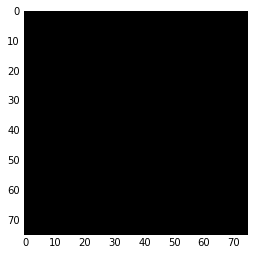

In [14]:
imshow(X_train['rgba'][5][0], cmap='gray')

In [15]:
X_train2, y_train2, X_test2, y_test2 = mlp.Patch.load('cylinder_small1')

Loaded /home/d/patches//cylinder_small1/ in 0.211961984634 seconds.


In [21]:
for i in range(X_train2['image'].shape[0]):
    if X_train2['image'][i][0].max() == 0:
        print 'zero', i
        
#imshow(X_train2['image'][1][0], cmap='gray')

KeyboardInterrupt: 

In [34]:
y_train[16]

0

In [44]:
X_train['rgba_large'][16][0].dtype

dtype('float32')

In [41]:
y_train2[3]

0

In [42]:
X_train2['image'][3][0].max()

0.88235295

In [23]:
for i in range(X_train['rgba'].shape[0]):
    if X_train['rgba'][i][0].max() == 0:
        print 'zero', i

zero 0
zero 2
zero 4
zero 5
zero 6
zero 9
zero 11
zero 12
zero 14


KeyboardInterrupt: 

In [22]:
i

62

In [7]:
cnn = cnn.fit(X_train['rgba_large'], y_train)

# Neural Network with 1558642 learnable parameters

## Layer information

  #  name      size
---  --------  --------
  0  input     4x75x75
  1  conv1     64x63x63
  2  pool1     64x31x31
  3  conv2     48x19x19
  4  pool2     48x9x9
  5  hidden3   256
  6  dropout3  256
  7  output    2

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  ------
      1           nan           nan          nan      0.48255  76.56s


In [7]:
# this is the score on cylinder_small1 with regularization and patience counter 50 and data augmentation
cnn.score(X_test_rgba, y_test)

0.8134585889570553

<module 'matplotlib.pyplot' from '/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

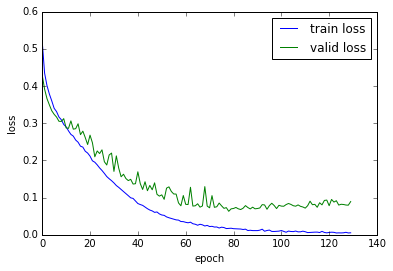

In [8]:
# this is the plot on cylinder_small1 with regularization and patience counter 50 and data augmentation
plot_loss(cnn)

In [13]:
# this is the score on cylinder_small1 with regularization and patience counter 50
cnn.score(X_test_rgba, y_test)

0.825920245398773

In [26]:
cnn.predict(X_test_rgba[1020:1030])

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1])

In [27]:
y_test[1020:1030]

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1], dtype=uint8)

In [28]:
cnn.predict_proba(X_test_rgba[1020:1030])

array([[  9.99682486e-01,   3.17418977e-04],
       [  6.14051678e-05,   9.99938607e-01],
       [  8.44372869e-01,   1.55627146e-01],
       [  7.36285513e-03,   9.92637157e-01],
       [  2.22408939e-02,   9.77759123e-01],
       [  7.73647875e-02,   9.22635257e-01],
       [  1.00000000e+00,   3.94398209e-10],
       [  9.99997377e-01,   2.64260507e-06],
       [  1.00000000e+00,   2.59170388e-21],
       [  5.43179078e-11,   1.00000000e+00]], dtype=float32)

<module 'matplotlib.pyplot' from '/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

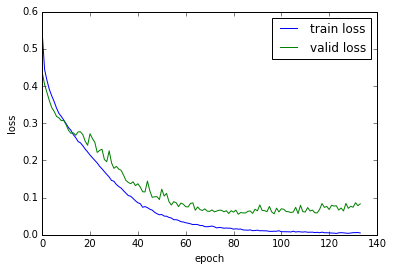

In [14]:
# this is the plot on cylinder_small1 with regularization and patience counter 50
plot_loss(cnn)

In [10]:
# this is the score on cylinder_small1 with regularization
cnn.score(X_test_rgba, y_test)

0.8136503067484663

<module 'matplotlib.pyplot' from '/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

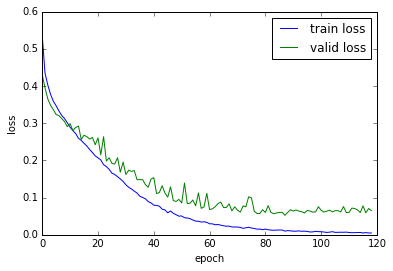

In [9]:
# this is the plot on cylinder_small1 without regularization
plot_loss(cnn)

In [7]:
# this is the score on cylinder_small1 without regularization
cnn.score(X_test_rgba, y_test)

0.8190184049079755

<module 'matplotlib.pyplot' from '/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

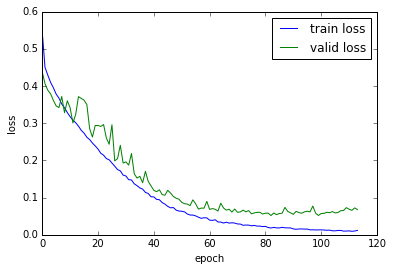

In [9]:
# this is the plot on cylinder_small1 without regularization
plot_loss(cnn)